## Регулярные выражения

#### Скачаем несколько файлов для работы с регулярками (есть на GDrive)

In [1]:
!wget https://raw.githubusercontent.com/nstsj/python_for_CL/0cbe2305f7fece62893545e01b7103cbf89c3c49/regexes/addresses.txt
!wget https://raw.githubusercontent.com/nstsj/python_for_CL/0cbe2305f7fece62893545e01b7103cbf89c3c49/regexes/d_speech.txt
!wget https://raw.githubusercontent.com/nstsj/python_for_CL/0cbe2305f7fece62893545e01b7103cbf89c3c49/regexes/ея.txt

--2022-02-15 16:55:42--  https://raw.githubusercontent.com/nstsj/python_for_CL/0cbe2305f7fece62893545e01b7103cbf89c3c49/regexes/addresses.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1224 (1.2K) [text/plain]
Saving to: ‘addresses.txt.2’

addresses.txt.2     100%[===================>]   1.20K  --.-KB/s    in 0s      

2022-02-15 16:55:43 (44.9 MB/s) - ‘addresses.txt.2’ saved [1224/1224]

--2022-02-15 16:55:43--  https://raw.githubusercontent.com/nstsj/python_for_CL/0cbe2305f7fece62893545e01b7103cbf89c3c49/regexes/d_speech.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:80

## Регулярные выражения в Python

Для работы с регулярными выражениями в питоне есть встроенная библиотека `re` (документацию можно почитать [вот здесь](https://docs.python.org/3/library/re.html)). Для работы нужно сначала ее импортировать, как и любую другую библиотеку. Рассмотрим наиболее часто используемые методы:

* re.match()
* re.search()
* re.findall()
* re.sub()
* re.compile()

### re.match()

Этот метод ищет по заданному шаблону **только** в начале строки. Например, если мы вызовем метод `match()` на строке "the cat is on the mat" с шаблоном "the", то он найдет первое "the" в строке и завершится успешно. Однако если поискать "cat", то результат будет отрицательный. У этого метода два аргумента:

* что найти (шаблон)
* где найти (строка)

In [2]:
import re

re.match('the', 'the cat is on the mat')

<re.Match object; span=(0, 3), match='the'>

In [3]:
print(re.match('cat', 'the cat is on the mat'))

None


### re.search()

Этот метод, в отличие от предыдущего, ищет заданный шаблон в **любом** месте строки, но возвращает только первое найденное совпадение. Аргументы те же.

In [4]:
re.search('the', 'the cat is on the mat')

<re.Match object; span=(0, 3), match='the'>

In [5]:
re.search('cat', 'the cat is on the mat')

<re.Match object; span=(4, 7), match='cat'>

А как вывести не объект, а саму строку, которая нашлась по шаблону? Для естьго есть метод `group()`, который в качестве аргумента принимает номер группы. В случае `match()` и `search()` возвращается только одна группа под номером 0. Здесь, как и в случае с индексами, нумерация начинается с 0.

In [6]:
re.search('cat', 'the cat is on the mat').group(0)

'cat'

### re.findall()

Этот метод возвращает список **всех** найденных совпадений в любом месте строки. Аргументы у него те же,  что и у предыдущих двух методов, а возвращает он список совпадений.

In [7]:
re.findall('the', 'the cat is on the mat')

['the', 'the']

In [8]:
re.findall('the', 'the cat is on the mat')[1]

'the'

### re.finditer()

Этот метод возвращает список **всех** найденных совпадений в любом месте строки. Аргументы у него всё те же, а возвращает он список совпадений с спанами.

In [18]:
text = """
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега. Комплектация полная. Новая в салоне 750 000, отдам за 650 000. Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.

* Модификация: 1.6 MT (89 л.с.) 
* Владельцев по ПТС: 4+ 
* VIN или номер кузова: XTA21104*50****47 
* Мультимедиа и навигация: CD/DVD/Blu-ray 
* Шины и диски: 14" 

Краснодар, ул. Миклухо-Маклая, д. 4/5, подъезд 1 

Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 

e-mail: ivanov.ivan-61@mail.ru 

И.И. Иванов (Иван Иванович) 
"""


regex = '(8|\+7)' + \
        '\s?' + \
        '\(?' + '\d{3}' + '\)?' + \
        '[\s-]?' + '\d{3}' + \
        '[\s-]?' + '\d{2}' + \
        '[\s-]?' + '\d{2}'

print(regex)
for m in re.finditer(regex, text):
    print(f"{m.start()}\t{m.end()}\t{m.group()}")
    print(str(m.start()) + "\t" + str(m.end()) +"\t"+ str(m.group()))

(8|\+7)\s?\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{2}[\s-]?\d{2}
427	440	8(999)1234567
427	440	8(999)1234567
442	457	8 903 987-65-43
442	457	8 903 987-65-43
459	477	+7 (351) 111 22 33
459	477	+7 (351) 111 22 33


In [13]:
text[427:440]

'8(999)1234567'

In [19]:
list(re.finditer('the', 'the cat is on the mat'))

[<re.Match object; span=(0, 3), match='the'>,
 <re.Match object; span=(14, 17), match='the'>]

### re.sub()

Этот метод ищет шаблон в строке и заменяет его на указанную подстрок. Если шаблон не найден, строка остается неизменной. Соответствено, в отличие от предыдущих методов, у него 3 аргумента:
* что заменить
* на что заменить
* где заменить

Заменяются все подстроки, которые нашлись по шаблону.

In [20]:
with open("ея.txt", "r+", encoding="utf-8") as o:
    text = o.read()
text

'\nЕстественный язык\nМатериал из Википедии — свободной энциклопедии\nТекущая версия страницы пока не проверялась опытными участниками и может значительно отличаться от версии, проверенной 16 апреля 2018; проверки требуют 2 правки.\nПерейти к навигацииПерейти к поиску\nУлучшение статьи\nДля улучшения этой статьи желательно:\nНайти и оформить в виде сносок ссылки на независимые авторитетные источники, подтверждающие написанное.\nПожалуйста, после исправления проблемы исключите её из списка параметров. После устранения всех недостатков этот шаблон может быть удалён любым участником.\nЕсте́ственный язы́к — в лингвистике и философии языка язык, используемый для общения людей (в отличие от формальных языков и других типов знаковых систем, также называемых языками в семиотике) и не созданный целенаправленно (в отличие от искусственных языков).\n\nСловарь и грамматические правила естественного языка определяются практикой применения и не всегда бывают формально зафиксированы.\n\n\nСодержание\

In [21]:
print(re.sub("яз(ы|ы́)к", "шашл" + r"\1" + "к", text))


Естественный шашлык
Материал из Википедии — свободной энциклопедии
Текущая версия страницы пока не проверялась опытными участниками и может значительно отличаться от версии, проверенной 16 апреля 2018; проверки требуют 2 правки.
Перейти к навигацииПерейти к поиску
Улучшение статьи
Для улучшения этой статьи желательно:
Найти и оформить в виде сносок ссылки на независимые авторитетные источники, подтверждающие написанное.
Пожалуйста, после исправления проблемы исключите её из списка параметров. После устранения всех недостатков этот шаблон может быть удалён любым участником.
Есте́ственный шашлы́к — в лингвистике и философии шашлыка шашлык, используемый для общения людей (в отличие от формальных шашлыков и других типов знаковых систем, также называемых шашлыками в семиотике) и не созданный целенаправленно (в отличие от искусственных шашлыков).

Словарь и грамматические правила естественного шашлыка определяются практикой применения и не всегда бывают формально зафиксированы.


Содержание

In [22]:
re.sub('the', 'my', 'the cat is on the mat')

'my cat is on my mat'

In [23]:
#@title #####ячейка спрятана




text = """
Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега. Комплектация полная. Новая в салоне 750 000, отдам за 650 000. Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.

* Модификация: 1.6 MT (89 л.с.) 
* Владельцев по ПТС: 4+ 
* VIN или номер кузова: XTA21104*50****47 
* Мультимедиа и навигация: CD/DVD/Blu-ray 
* Шины и диски: 14" 

Краснодар, ул. Миклухо-Маклая, д. 4/5, подъезд 1 

Тел. 8(999)1234567, 8 903 987-65-43, +7 (351) 111 22 33 

e-mail: ivanov.ivan-61@mail.ru 

И.И. Иванов (Иван Иванович) 
"""


regex = '(8|\+7)' + \
        '\s?' + \
        '\(?' + '\d{3}' + '\)?' + \
        '[\s-]?' + '\d{3}' + \
        '[\s-]?' + '\d{2}' + \
        '[\s-]?' + '\d{2}'

print(regex)

print(re.sub(regex, "PHONE", text))


(8|\+7)\s?\(?\d{3}\)?[\s-]?\d{3}[\s-]?\d{2}[\s-]?\d{2}

Продаётся LADA 4x4. ПТС 01.12.2018, куплена 20 января 19 года, 10 000 км пробега. Комплектация полная. Новая в салоне 750 000, отдам за 650 000. Возможен обмен на ВАЗ-2110 или ВАЗ 2109 с вашей доплатой.

* Модификация: 1.6 MT (89 л.с.) 
* Владельцев по ПТС: 4+ 
* VIN или номер кузова: XTA21104*50****47 
* Мультимедиа и навигация: CD/DVD/Blu-ray 
* Шины и диски: 14" 

Краснодар, ул. Миклухо-Маклая, д. 4/5, подъезд 1 

Тел. PHONE, PHONE, PHONE 

e-mail: ivanov.ivan-61@mail.ru 

И.И. Иванов (Иван Иванович) 



In [73]:
a = int(input())

5


In [75]:
re.findall('[1-'+str(a)+']', '1 2 3 4 5 6 7')

['1', '2', '3', '4', '5']

In [76]:
re.findall('[1-5]', '1 2 3 4 5 6 7')

['1', '2', '3', '4', '5']

In [79]:
re.findall(str(a), '1 2 3 4 5 6 7')

['5']

### Ищем телефоны в банковских сайтах

In [24]:
!curl -XGET https://www.sberbank.ru/ru/person > sberbank.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  311k    0  311k    0     0  2907k      0 --:--:-- --:--:-- --:--:-- 2907k


<!DOCTYPE html><html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article#"><head><meta charset="UTF-8" /><meta http-equiv="X-UA-TextLayoutMetrics" content="gdi" /><meta http-equiv="cleartype" content="on" /><meta http-equiv="X-DNS-Prefetch-Control" content="on" /><meta name="viewport" content="viewport-fit=cover, width=device-width, initial-scale=1.0" /><title>Частным клиентам  — СберБанк</title><link href="//www.googletagmanager.com" rel="preconnect"/><link href="//www.google-analytics.com" rel="preconnect"/><link href="//mc.yandex.ru" rel="preconnect"/><link href="/portalserver/static/templates/%5BBBHOST%5D/RuMasterpageTemplate/static/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/portalserver/static/templates/%5BBBHOST%5D/RuMasterpageTemplate/static/apple-touch-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/portalserver/static/templates/%5BBBHOST%5D/RuMasterpageTemplate/static/apple-touch-icon-144x14
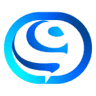

In [25]:
text = ''.join([line for line in open("sberbank.txt", 'r', encoding="UTF-8")])
print(text)

In [26]:
regex

'(8|\\+7)\\s?\\(?\\d{3}\\)?[\\s-]?\\d{3}[\\s-]?\\d{2}[\\s-]?\\d{2}'

In [27]:
for m in re.finditer(regex, text):
    print(f"{m.start()}\t{m.end()}\t{m.group()}")

In [28]:
!curl -XGET https://sovcombank.ru/ > sovcombank.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  120k  100  120k    0     0   880k      0 --:--:-- --:--:-- --:--:--     0    0 --:--:-- --:--:-- --:--:--  873k


In [29]:
text = ''.join([line for line in open("sovcombank.txt", 'r', encoding="UTF-8")])
print(text)

<!DOCTYPE html><html lang="ru"><head><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"/><link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png"/><link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png"/><link rel="manifest" href="/site.webmanifest"/><meta charSet="utf-8"/><title>Совкомбанк - кредиты наличными и карты рассрочки, вклады, автокредиты и ипотека, услуги для бизнеса</title><meta name="description" content="Официальный сайт Совкомбанка. Вносите платежи по кредиту, открывайте вклады и переводите деньги с карты на карту в режиме онлайн."/><meta property="og:title" content="Совкомбанк - кредиты наличными и карты рассрочки, вклады, автокредиты и ипотека, услуги для бизнеса"/><meta property="og:image:secure_url" content="https://sovcombank.ru/assets/images/og/private.png"/><meta property="og:image:width" content="1280"/><meta property="og:image:height" content="630"/><meta name="og:locale" content="ru_RU"/><meta name="og:t

In [30]:
for m in re.finditer(regex, text):
    print(f"{m.start()}\t{m.end()}\t{m.group()}")

12177	12191	8 800 100 0006
14310	14324	8 800 100 0006
14811	14825	8 800 100 0006
75111	75127	+7 495 988 00 00
75157	75173	+7 495 988 00 00
75271	75285	8 800 100 0006
75315	75329	8 800 100 0006
100962	100978	+7 495 988 00 00
101066	101080	8 800 100 0006
101167	101181	8 800 100 0006


###  re.compile()

Мы можем собрать регулярное выражение в отдельный объект. Это полезно, когда нам нужно много раз использовать один и тот же паттерн: во-первых, не придется каждый раз переписывать одну и ту же регулярку, а во вторых, так программа будет гораздо быстрее! 

In [31]:
# компилируем регулярку для поиска котиков
cats = re.compile('cat')

# а теперь можно использовать эту переменную вместо re с любым из методов
# но во всех будет на один аргумент ("что искать/заменять") меньше 
print(cats.search('the cat is on the mat').group(0))
print(cats.findall('my cat is black, my cat is fat, my cat likes rats, rats are gray and fat'))
print(cats.sub('dog', 'the cat is on the mat'))

cat
['cat', 'cat', 'cat']
the dog is on the mat


In [47]:
re.findall('\w+', "the cat is on the mat cover's")

['the', 'cat', 'is', 'on', 'the', 'mat', 'cover', 's']

### Еще раз о синтаксисе регулярных выражений

Повторим основные элементы.

Символ|Значение
------|--------
`.`	| Один любой символ, кроме новой строки \n.
`?`	| 0 или 1 вхождение шаблона слева
`+`	| 1 и более вхождений шаблона слева
`\*``	| 0 и более вхождений шаблона слева
`\w`	| Любая цифра или буква (\W — все, кроме буквы или цифры)
`\d`	| Любая цифра [0-9] (\D — все, кроме цифры)
`\s`	| Любой пробельный символ (\S — любой непробельнй символ)
`\b`	| Граница слова
`[..]`| Один из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)
`\`	|Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)
`^` и `$` |	Начало и конец строки соответственно
`{n,m}`| От n до m вхождений ({,m} — от 0 до m)
`(a\|b)` |Соответствует a или b
`()`	| Группирует выражение и возвращает найденный текст
`\t`, `\n`, `\r`	| Символ табуляции, новой строки и возврата каретки соответственно
`(?P<name>...)` | Именованная группа

In [48]:
with open("addresses.txt", "r+", encoding="utf-8") as o:
    text = o.read()



In [49]:
text

'Nordstrom Rack and HauteLook\nNordstrom Rack is the off-price retail division of Nordstrom Inc., which was founded in 1901 in Seattle, Washington, by John W. Nordstrom.\n\nNordstrom encourages contact from its customers and has supplied contact details to us.\n\n700 S. Flower Street\nSuite 1700\nLos Angeles, CA 90017\nhttps://www.nordstromrack.com/\n\nPhone Contacts\nMain: (206) 628-2111\nCustomer Service: (888)966-6283\nInternational: (319) 846-4140\n\nNordstrom Customer Service: (888)282-6060\n\n \n\nEmail Contacts\nContact@nordstrom.com\n\nSocial Media Contacts\nFacebook\nTwitter\n\nExecutive Contacts\nPrimary Contact\nAndrew Breen\nDirector Customer Care\n700 S. Flower Street\nSuite 1700\nLos Angeles, CA 90017\nAndrew.Breen@HauteLook.com\n\nSecondary Contact\nJames F. Nordstrom\nExecutive Vice President and President of Nordstrom Stores\n1600 Seventh Avenue\nSuite 2600\nSeattle, WA 98101\nJamie.nordstrom@nordstrom.com\n\nGeevy Thomas\nPresident of Nordstrom Rack\n1600 Seventh Aven

In [60]:
re.findall(".", text)

['N',
 'o',
 'r',
 'd',
 's',
 't',
 'r',
 'o',
 'm',
 ' ',
 'R',
 'a',
 'c',
 'k',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'H',
 'a',
 'u',
 't',
 'e',
 'L',
 'o',
 'o',
 'k',
 'N',
 'o',
 'r',
 'd',
 's',
 't',
 'r',
 'o',
 'm',
 ' ',
 'R',
 'a',
 'c',
 'k',
 ' ',
 'i',
 's',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'o',
 'f',
 'f',
 '-',
 'p',
 'r',
 'i',
 'c',
 'e',
 ' ',
 'r',
 'e',
 't',
 'a',
 'i',
 'l',
 ' ',
 'd',
 'i',
 'v',
 'i',
 's',
 'i',
 'o',
 'n',
 ' ',
 'o',
 'f',
 ' ',
 'N',
 'o',
 'r',
 'd',
 's',
 't',
 'r',
 'o',
 'm',
 ' ',
 'I',
 'n',
 'c',
 '.',
 ',',
 ' ',
 'w',
 'h',
 'i',
 'c',
 'h',
 ' ',
 'w',
 'a',
 's',
 ' ',
 'f',
 'o',
 'u',
 'n',
 'd',
 'e',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 '1',
 '9',
 '0',
 '1',
 ' ',
 'i',
 'n',
 ' ',
 'S',
 'e',
 'a',
 't',
 't',
 'l',
 'e',
 ',',
 ' ',
 'W',
 'a',
 's',
 'h',
 'i',
 'n',
 'g',
 't',
 'o',
 'n',
 ',',
 ' ',
 'b',
 'y',
 ' ',
 'J',
 'o',
 'h',
 'n',
 ' ',
 'W',
 '.',
 ' ',
 'N',
 'o',
 'r',
 'd',
 's',
 't',
 'r',
 'o',
 'm',
 '.',
 'N'

In [61]:
re.findall(".+", text)

['Nordstrom Rack and HauteLook',
 'Nordstrom Rack is the off-price retail division of Nordstrom Inc., which was founded in 1901 in Seattle, Washington, by John W. Nordstrom.',
 'Nordstrom encourages contact from its customers and has supplied contact details to us.',
 '700 S. Flower Street',
 'Suite 1700',
 'Los Angeles, CA 90017',
 'https://www.nordstromrack.com/',
 'Phone Contacts',
 'Main: (206) 628-2111',
 'Customer Service: (888)966-6283',
 'International: (319) 846-4140',
 'Nordstrom Customer Service: (888)282-6060',
 ' ',
 'Email Contacts',
 'Contact@nordstrom.com',
 'Social Media Contacts',
 'Facebook',
 'Twitter',
 'Executive Contacts',
 'Primary Contact',
 'Andrew Breen',
 'Director Customer Care',
 '700 S. Flower Street',
 'Suite 1700',
 'Los Angeles, CA 90017',
 'Andrew.Breen@HauteLook.com',
 'Secondary Contact',
 'James F. Nordstrom',
 'Executive Vice President and President of Nordstrom Stores',
 '1600 Seventh Avenue',
 'Suite 2600',
 'Seattle, WA 98101',
 'Jamie.nordstro

In [53]:
re.findall("\d+.+\n.+\n.+\d{5}", text)

['700 S. Flower Street\nSuite 1700\nLos Angeles, CA 90017',
 '700 S. Flower Street\nSuite 1700\nLos Angeles, CA 90017',
 '1600 Seventh Avenue\nSuite 2600\nSeattle, WA 98101',
 '1600 Seventh Avenue\nSuite 2600\nSeattle, WA 98101',
 '700 S. Flower Street\nSuite 1700\nLos Angeles, CA 90017']

In [62]:
with open("d_speech.txt", "r+", encoding="utf-8") as o:
    text = o.read()

In [63]:
text

'А.П.Чехов "Глупый француз"\n\nКлоун из цирка братьев Гинц, Генри Пуркуа, зашёл в московский трактир Тестова позавтракать.\n\n— Дайте мне консоме! — приказал он половому.\n\n— Прикажете с пашотом или без пашота?\n\n— Нет, с пашотом слишком сытно... Две-три гренки, пожалуй, дайте...\n\nВ ожидании, пока подадут консоме, Пуркуа занялся наблюдением. Первое, что бросилось ему в глава, был какой-то полный благообразный господин, сидевший за соседним столом и приготовлявшийся есть блины.\n\n«Как, однако, много подают в русских ресторанах! — подумал француз, глядя, как сосед поливает свои блины горячим маслом.— Пять блинов! Разве один человек может съесть так много теста?»\n\nСосед между тем помазал блины икрой, разрезал все их на половинки и проглотил скорее, чем в пять минут...\n\n— Челаэк! — обернулся он к половому.— Подай ещё порцию! Да что у вас за порции такие? Подай сразу штук десять или пятнадцать! Дай балыка... семги, что ли?\n\n«Странно...— подумал Пуркуа, рассматривая соседа.— Съел 

In [67]:
re.findall(".+", text)

['А.П.Чехов "Глупый француз"',
 'Клоун из цирка братьев Гинц, Генри Пуркуа, зашёл в московский трактир Тестова позавтракать.',
 '— Дайте мне консоме! — приказал он половому.',
 '— Прикажете с пашотом или без пашота?',
 '— Нет, с пашотом слишком сытно... Две-три гренки, пожалуй, дайте...',
 'В ожидании, пока подадут консоме, Пуркуа занялся наблюдением. Первое, что бросилось ему в глава, был какой-то полный благообразный господин, сидевший за соседним столом и приготовлявшийся есть блины.',
 '«Как, однако, много подают в русских ресторанах! — подумал француз, глядя, как сосед поливает свои блины горячим маслом.— Пять блинов! Разве один человек может съесть так много теста?»',
 'Сосед между тем помазал блины икрой, разрезал все их на половинки и проглотил скорее, чем в пять минут...',
 '— Челаэк! — обернулся он к половому.— Подай ещё порцию! Да что у вас за порции такие? Подай сразу штук десять или пятнадцать! Дай балыка... семги, что ли?',
 '«Странно...— подумал Пуркуа, рассматривая сосе

In [68]:
re.findall("— .+?—", text)

['— Дайте мне консоме! —',
 '— подумал француз, глядя, как сосед поливает свои блины горячим маслом.—',
 '— Челаэк! —',
 '— подумал Пуркуа, рассматривая соседа.—',
 '— подумал француз.—',
 '— Дай ещё икры! —',
 '— ужаснулся клоун.—',
 '— Подашь бутылку Нюи...—',
 '— изумился клоун, откидываясь на спинку стула.—',
 '— То есть, э... э... они требуют-с! Как же не подавать-с? —',
 '— возмутился про себя француз.—',
 '— Порядки, нечего сказать! —',
 '— Pardon, monsieur, —',
 '— продолжал ужасаться француз.—',
 '— думал он, глядя на соседа.—',
 '— Послушайте, monsieur,—',
 '— Я вас не понимаю! —',
 '— Я много ем?! —',
 '— думал Пуркуа, выходя из ресторана.—']

In [69]:
re.findall("— .+", text)

['— Дайте мне консоме! — приказал он половому.',
 '— Прикажете с пашотом или без пашота?',
 '— Нет, с пашотом слишком сытно... Две-три гренки, пожалуй, дайте...',
 '— подумал француз, глядя, как сосед поливает свои блины горячим маслом.— Пять блинов! Разве один человек может съесть так много теста?»',
 '— Челаэк! — обернулся он к половому.— Подай ещё порцию! Да что у вас за порции такие? Подай сразу штук десять или пятнадцать! Дай балыка... семги, что ли?',
 '— подумал Пуркуа, рассматривая соседа.— Съел пять кусков теста и ещё просит! Впрочем, такие феномены не составляют редкости... У меня у самого в Бретани был дядя Франсуа, который на пари съедал две тарелки супу и пять бараньих котлет... Говорят, что есть также болезни, когда много едят...»',
 '— подумал француз.— И неужели он, чудак, воображает, что съест всю эту гору? Не съест и трёх кусков, как желудок его будет уже полон, а ведь придётся платить за всю гору!»',
 '— Дай ещё икры! — крикнул сосед, утирая салфеткой масляные губы.—

In [70]:
re.findall("«.+?—", text)

['«Как, однако, много подают в русских ресторанах! —',
 '«Странно...—',
 '«Очевидно, болен...—',
 '«Но... однако, уж половины горы нет! —',
 '«Может быть, это мне снится? —',
 '«Дикари! —',
 '«Бедняга...—',
 '«По-видимому, человек интеллигентный, молодой... полный сил...—',
 '«О, страна чудес! —']

In [71]:
re.findall("—.+»", text)

['— подумал француз, глядя, как сосед поливает свои блины горячим маслом.— Пять блинов! Разве один человек может съесть так много теста?»',
 '— подумал Пуркуа, рассматривая соседа.— Съел пять кусков теста и ещё просит! Впрочем, такие феномены не составляют редкости... У меня у самого в Бретани был дядя Франсуа, который на пари съедал две тарелки супу и пять бараньих котлет... Говорят, что есть также болезни, когда много едят...»',
 '— подумал француз.— И неужели он, чудак, воображает, что съест всю эту гору? Не съест и трёх кусков, как желудок его будет уже полон, а ведь придётся платить за всю гору!»',
 '— ужаснулся клоун.— Боже мой, он и всю семгу съел? Это даже неестественно... Неужели человеческий желудок так растяжим? Не может быть! Как бы ни был растяжим желудок, но он не может растянуться за пределы живота... Будь этот господин у нас во Франции, его показывали бы за деньги... Боже, уже нет горы!»',
 '— изумился клоун, откидываясь на спинку стула.— Этот человек хочет умереть! Нел

In [72]:
re.findall("— .+?—|— .+|«.+?—|—.+»", text)

['— Дайте мне консоме! —',
 '— Прикажете с пашотом или без пашота?',
 '— Нет, с пашотом слишком сытно... Две-три гренки, пожалуй, дайте...',
 '«Как, однако, много подают в русских ресторанах! —',
 '— Пять блинов! Разве один человек может съесть так много теста?»',
 '— Челаэк! —',
 '— Подай ещё порцию! Да что у вас за порции такие? Подай сразу штук десять или пятнадцать! Дай балыка... семги, что ли?',
 '«Странно...—',
 '— Съел пять кусков теста и ещё просит! Впрочем, такие феномены не составляют редкости... У меня у самого в Бретани был дядя Франсуа, который на пари съедал две тарелки супу и пять бараньих котлет... Говорят, что есть также болезни, когда много едят...»',
 '«Очевидно, болен...—',
 '— И неужели он, чудак, воображает, что съест всю эту гору? Не съест и трёх кусков, как желудок его будет уже полон, а ведь придётся платить за всю гору!»',
 '— Дай ещё икры! —',
 '— Не забудь зелёного луку!',
 '«Но... однако, уж половины горы нет! —',
 '— Боже мой, он и всю семгу съел? Это даже